## Compare snow depth / SWE variable in JRA%% and ERA5 over Alaska  

In [ ]:
import xarray as xr
import rioxarray
import cartopy.crs as ccrs
import cartopy.feature as cf
from matplotlib import pyplot as plt
from pathlib import Path

In [ ]:
datadir = Path("/Volumes/CWMobileSSD/Climate/JRA55/snow")
january_JRA55 = datadir / "anl_land.065_snwe.reg_tl319.2021010100_2021013118"
april_JRA55 = datadir / "anl_land.065_snwe.reg_tl319.2021040100_2021043018"
june_JRA55 = datadir / "anl_land.065_snwe.reg_tl319.2021060100_2021063018"
datadir = Path("/Volumes/CWMobileSSD/Climate/ERA5/sd_grib")
january_ERA5 = datadir / "e5.oper.an.sfc.128_141_sd.ll025sc.2021010100_2021013123.grb"
april_ERA5 = datadir / "e5.oper.an.sfc.128_141_sd.ll025sc.2021040100_2021043023.grb"
june_ERA5 = datadir / "e5.oper.an.sfc.128_141_sd.ll025sc.2021060100_2021063023.grb"

In [ ]:
ds = xr.open_dataset(january_JRA55, engine="cfgrib")
ds

<xarray.Dataset>
Dimensions:     (time: 124, latitude: 320, longitude: 640)
Coordinates:
  * time        (time) datetime64[ns] 2021-01-01 ... 2021-01-31T18:00:00
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 89.57 89.01 88.45 ... -88.45 -89.01 -89.57
  * longitude   (longitude) float64 0.0 0.5625 1.125 1.688 ... 358.3 358.9 359.4
    valid_time  (time) datetime64[ns] ...
Data variables:
    sd          (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             rjtd
    GRIB_centreDescription:  Japanese Meteorological Agency - Tokyo
    GRIB_subCentre:          241
    Conventions:             CF-1.7
    institution:             Japanese Meteorological Agency - Tokyo
    history:                 2023-02-10T11:11 GRIB to CDM+CF via cfgrib-0.9.1...

In [ ]:
ds = xr.open_dataset(january_ERA5)
ds

<xarray.Dataset>
Dimensions:     (time: 744, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 ...
  * time        (time) datetime64[ns] 2021-01-01 ... 2021-01-31T23:00:00
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time  (time) datetime64[ns] ...
Data variables:
    sd          (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-02-10T11:11 GRIB to CDM+CF via cfgrib-0.9.1...

In [ ]:
cmap = plt.get_cmap('Blues', 6)

/Users/chris/mambaforge/envs/dyndowntools/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/chris/mambaforge/envs/dyndowntools/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/chris/mambaforge/envs/dyndowntools/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/chris/mambaforge/envs/dyndowntools/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/chris/mambaforge/envs/dyndowntools/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/chris/mambaforge/envs/dyndowntools/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encou

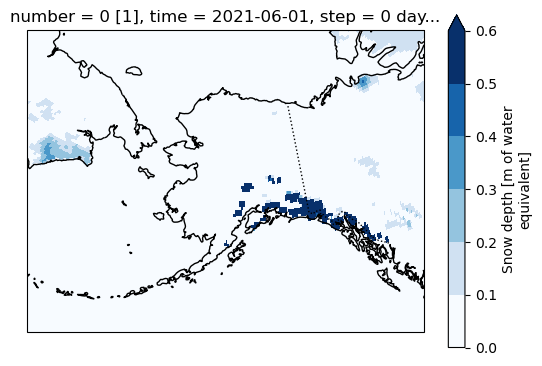

In [ ]:
projection = ccrs.AlbersEqualArea(
    central_longitude=-154.0, central_latitude=50.0, 
    standard_parallels=(55.0, 65.0))
ax = plt.axes(projection=projection)
ax.set_extent([-180, -130, 48, 75])
ax.coastlines()
ax.add_feature(cf.BORDERS, linestyle=':')
ds.sd.isel(time=0).plot(
    cmap=cmap, cbar_kwargs={"shrink": 0.9},
    transform=ccrs.PlateCarree(),
    ax=ax,
    vmax=0.6
)

Can't read index file '/Volumes/CWMobileSSD/Climate/ERA5/sd_grib/e5.oper.an.sfc.128_141_sd.ll025sc.2021040100_2021043023.grb.923a8.idx'
Traceback (most recent call last):
  File "/Users/chris/mambaforge/envs/dyndowntools/lib/python3.11/site-packages/cfgrib/messages.py", line 547, in from_indexpath_or_filestream
    self = cls.from_indexpath(indexpath)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/chris/mambaforge/envs/dyndowntools/lib/python3.11/site-packages/cfgrib/messages.py", line 429, in from_indexpath
    index = pickle.load(file)
            ^^^^^^^^^^^^^^^^^
EOFError: Ran out of input
/Users/chris/mambaforge/envs/dyndowntools/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/chris/mambaforge/envs/dyndowntools/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/chris/mambaforge/envs/dyndowntools/li

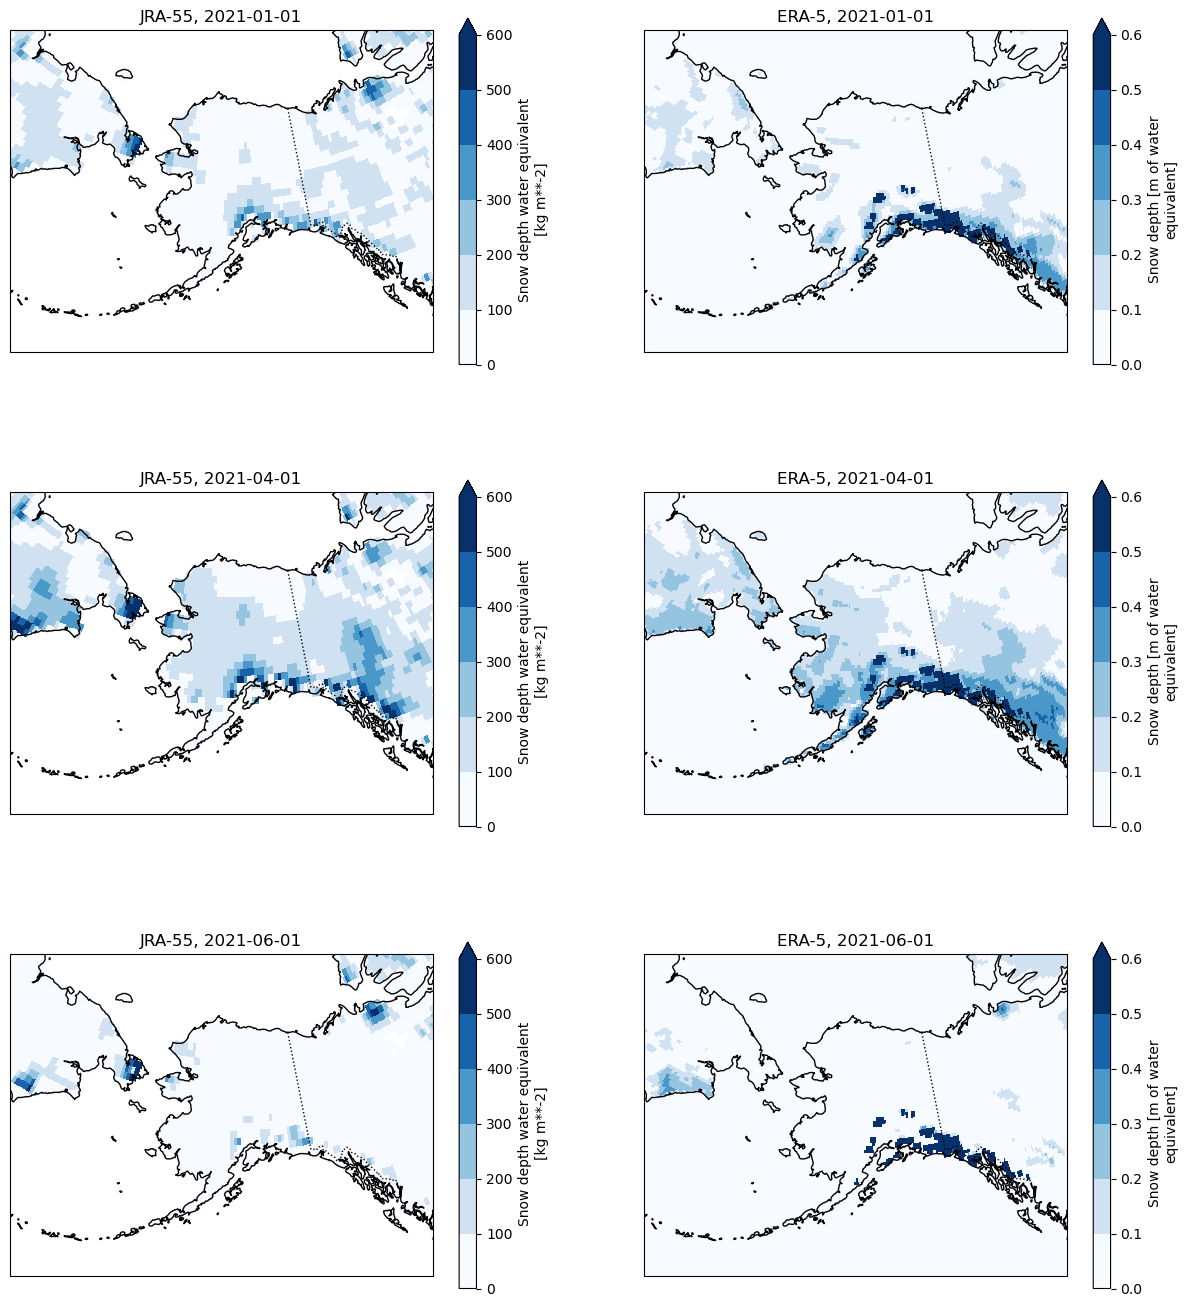

In [ ]:
fig, axs = plt.subplots(nrows=3,ncols=2,
                        subplot_kw={'projection': projection},
                        figsize=(15,17))
for ax in axs.flatten():
    ax.set_extent([-180, -130, 48, 75])
    ax.coastlines()
    ax.add_feature(cf.BORDERS, linestyle=':')
with xr.open_dataset(january_JRA55, engine="cfgrib") as ds:
    ds.sd.isel(time=0).plot(
        cmap=cmap, cbar_kwargs={"shrink": 0.9},
        transform=ccrs.PlateCarree(),
        ax=axs[0][0],
        vmax=600
    )
    axs[0][0].set_title(f"JRA-55, {ds.time[0].dt.strftime('%Y-%m-%d').data}")
with xr.open_dataset(april_JRA55, engine="cfgrib") as ds:
    ds.sd.isel(time=0).plot(
        cmap=cmap, cbar_kwargs={"shrink": 0.9},
        transform=ccrs.PlateCarree(),
        ax=axs[1][0],
        vmax=600
    )
    axs[1][0].set_title(f"JRA-55, {ds.time[0].dt.strftime('%Y-%m-%d').data}")
with xr.open_dataset(june_JRA55, engine="cfgrib") as ds:
    ds.sd.isel(time=0).plot(
        cmap=cmap, cbar_kwargs={"shrink": 0.9},
        transform=ccrs.PlateCarree(),
        ax=axs[2][0],
        vmax=600
    )
    axs[2][0].set_title(f"JRA-55, {ds.time[0].dt.strftime('%Y-%m-%d').data}")
with xr.open_dataset(january_ERA5, engine="cfgrib") as ds:
    ds.sd.isel(time=0).plot(
        cmap=cmap, cbar_kwargs={"shrink": 0.9},
        transform=ccrs.PlateCarree(),
        ax=axs[0][1],
        vmax=0.6
    )
    axs[0][1].set_title(f"ERA-5, {ds.time[0].dt.strftime('%Y-%m-%d').data}")
with xr.open_dataset(april_ERA5, engine="cfgrib") as ds:
    ds.sd.isel(time=0).plot(
        cmap=cmap, cbar_kwargs={"shrink": 0.9},
        transform=ccrs.PlateCarree(),
        ax=axs[1][1],
        vmax=0.6
    )
    axs[1][1].set_title(f"ERA-5, {ds.time[0].dt.strftime('%Y-%m-%d').data}")
with xr.open_dataset(june_ERA5, engine="cfgrib") as ds:
    ds.sd.isel(time=0).plot(
        cmap=cmap, cbar_kwargs={"shrink": 0.9},
        transform=ccrs.PlateCarree(),
        ax=axs[2][1],
        vmax=0.6
    )
    axs[2][1].set_title(f"ERA-5, {ds.time[0].dt.strftime('%Y-%m-%d').data}")

In [ ]:
outdir = Path("/Volumes/CWMobileSSD/Climate/figures")
fig.savefig(outdir / "JRA55_ERA5_SWE_comp01.png", bbox_inches="tight", dpi=200, facecolor='white')